# Exploratory Data Analysis (EDA) - BanglaMisinformationGuard

## Objectives
1. Load and clean the BanFakeNews dataset.
2. Check for data quality (missing values, duplicates).
3. Analyze label distribution.
4. Analyze text characteristics (length, tokens).
5. Analyze Bangla-specific features (punctuation, emojis, etc.).
6. N-gram analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
sns.set_style('whitegrid')

## 1. Load Data

In [2]:
# Load datasets
try:
    authentic_df = pd.read_csv('../data/raw/Authentic-48K.csv')
    fake_df = pd.read_csv('../data/raw/Fake-1K.csv')
    print("Datasets loaded successfully.")
except FileNotFoundError:
    print("Data not found. Please run 'make download-data' first.")

Datasets loaded successfully.


In [3]:
# Add labels (0 for Authentic, 1 for Fake)
authentic_df['label'] = 0
fake_df['label'] = 1

# Combine datasets
df = pd.concat([authentic_df, fake_df], ignore_index=True)
print(f"Total shape: {df.shape}")

Total shape: (49977, 7)


## 2. strict Cleaning & Quality Check
- Missing values
- Duplicates

In [4]:
# Missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 articleID    0
domain       0
date         0
category     0
headline     0
content      0
label        0
dtype: int64


In [5]:
# Check for duplicates (content)
duplicates = df.duplicated(subset=['content']).sum()
print(f"Duplicate rows based on content: {duplicates}")

# Drop duplicates if any
df.drop_duplicates(subset=['content'], inplace=True)

# CLEANING: Handle NaNs and ensure string type
df['content'] = df['content'].fillna('')
df['content'] = df['content'].astype(str)
df = df[df['content'].str.strip() != '']
print(f"Shape after cleaning: {df.shape}")

Duplicate rows based on content: 0
Shape after cleaning: (49976, 7)


## 3. Label Distribution

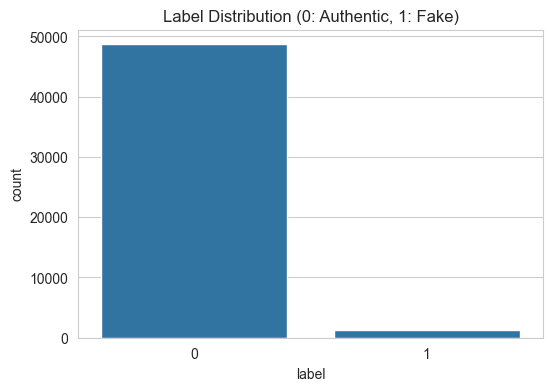

label
0    0.974008
1    0.025992
Name: proportion, dtype: float64


In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df)
plt.title('Label Distribution (0: Authentic, 1: Fake)')
plt.show()

print(df['label'].value_counts(normalize=True))

## 4. Text Length Analysis

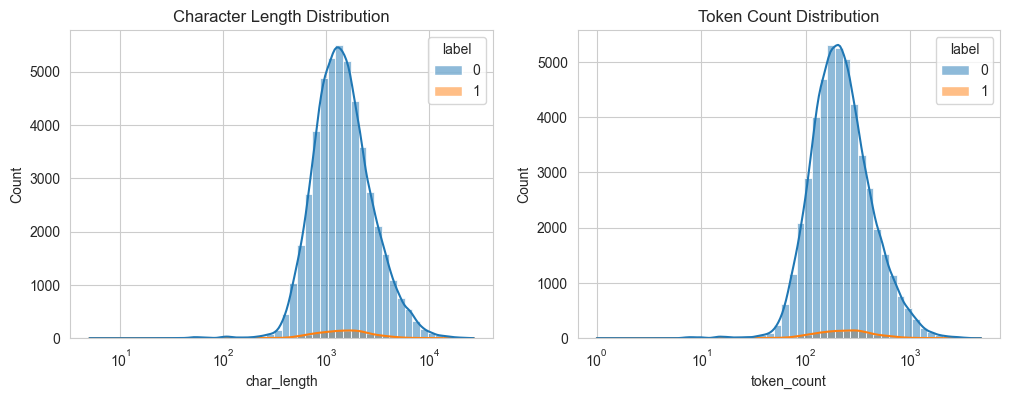

In [7]:
# Ensure content is string
df['content'] = df['content'].astype(str)

# Character count
df['char_length'] = df['content'].apply(len)

# Token count (simple whitespace split for now)
df['token_count'] = df['content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df, x='char_length', hue='label', kde=True, bins=50, log_scale=True)
plt.title('Character Length Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df, x='token_count', hue='label', kde=True, bins=50, log_scale=True)
plt.title('Token Count Distribution')
plt.show()

## 5. Bangla-Specific Features Analysis
- Punctuation usage
- Emoji usage
- Latin character usage (potential feature of fake news?)

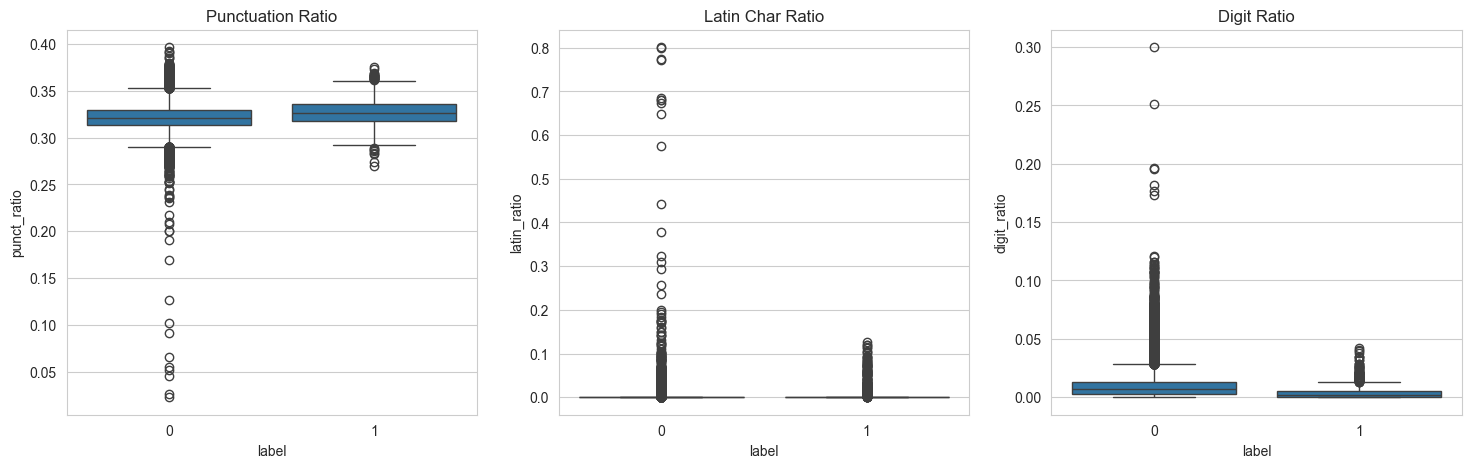

In [8]:
def calculate_ratios(text):
    length = len(text)
    if length == 0: return 0, 0, 0
    
    # Bengali Unicode Range: 0980–09FF
    # Punctuation (General)
    punct_count = len(re.findall(r'[^\w\s]', text))
    
    # Latin characters (a-z, A-Z)
    latin_count = len(re.findall(r'[a-zA-Z]', text))
    
    # Digits
    digit_count = len(re.findall(r'\d', text))
    
    return punct_count/length, latin_count/length, digit_count/length

feature_data = df['content'].apply(lambda x:  pd.Series(calculate_ratios(x)))
df[['punct_ratio', 'latin_ratio', 'digit_ratio']] = feature_data

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(x='label', y='punct_ratio', data=df, ax=axes[0])
axes[0].set_title('Punctuation Ratio')

sns.boxplot(x='label', y='latin_ratio', data=df, ax=axes[1])
axes[1].set_title('Latin Char Ratio')

sns.boxplot(x='label', y='digit_ratio', data=df, ax=axes[2])
axes[2].set_title('Digit Ratio')
plt.show()

## 6. N-Gram Analysis (Top Unigrams & Bigrams)

C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2474 (\N{BENGALI LETTER PA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: 

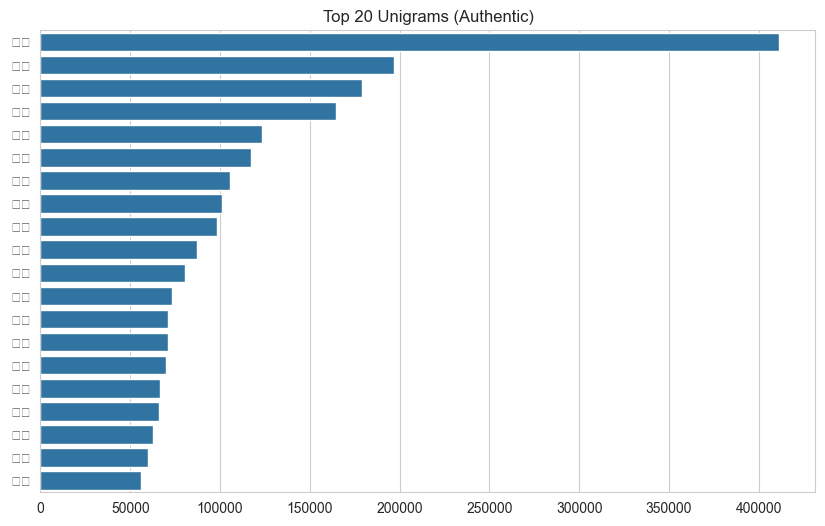

C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.p

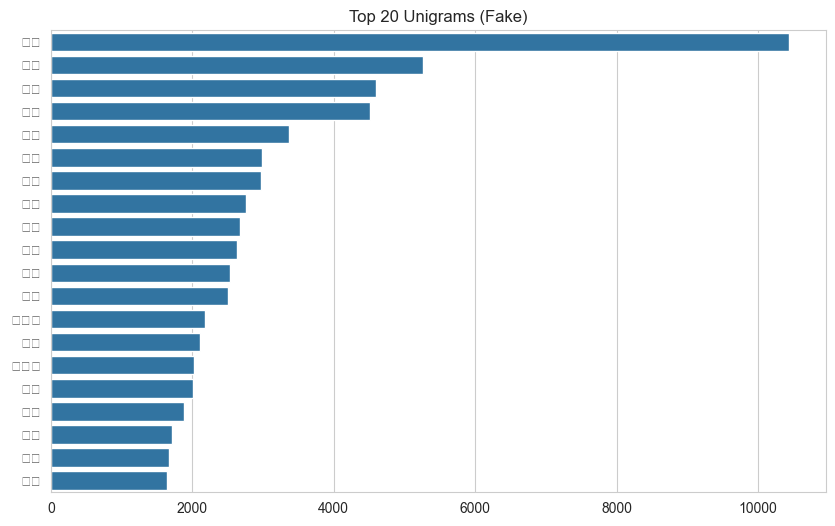

C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: 

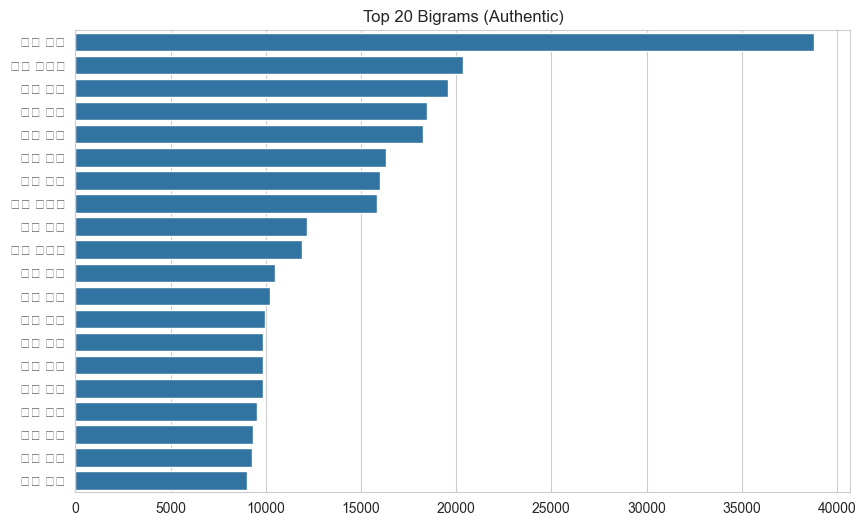

C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SupaPwn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: 

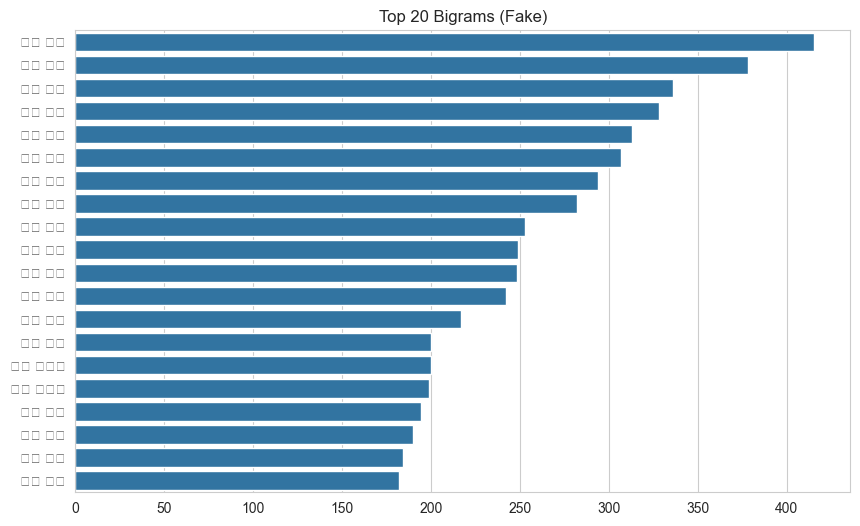

In [9]:
def plot_top_ngrams(text_series, n=1, top_k=20, title="Top N-grams"):
    vec = CountVectorizer(ngram_range=(n, n), max_features=top_k, stop_words=None) # Stop words removal requires a Bangla list
    try:
        bag_of_words = vec.fit_transform(text_series)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        common_words = words_freq[:top_k]
        words = [x[0] for x in common_words]
        counts = [x[1] for x in common_words]
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=counts, y=words)
        plt.title(title)
        plt.show()
    except ValueError:
        print(f"Could not generate n-grams for {title}")

# Authentic Unigrams
plot_top_ngrams(df[df['label']==0]['content'], n=1, title="Top 20 Unigrams (Authentic)")
# Fake Unigrams
plot_top_ngrams(df[df['label']==1]['content'], n=1, title="Top 20 Unigrams (Fake)")

# Authentic Bigrams
plot_top_ngrams(df[df['label']==0]['content'], n=2, title="Top 20 Bigrams (Authentic)")
# Fake Bigrams
plot_top_ngrams(df[df['label']==1]['content'], n=2, title="Top 20 Bigrams (Fake)")